# Bank Customers Churn Prediction

- We have to predict that Customers of the bank will leave or not based on the given dataset.

https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers(for more detail click this link)

#### 1 importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.1 Loading dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. EDA

#### 2.1 Checking misssing values

In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Here no null values in this datatype, So we can do further process.

####  2.2 checking the datatype

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Here from above information we can see that Dtype of surname , Geography & Gender  column are Object type.So we have to convert these columns into  numeric Datatype and apart from these, All column are Numeric type.

In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 2.3 Proportion of customer churned and retained

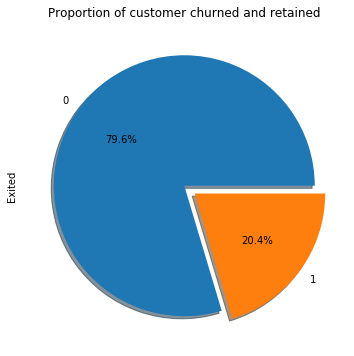

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
value_counts = pd.value_counts(dataset['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%1.1f%%', shadow=True)
plt.title('Proportion of customer churned and retained')
plt.show()
value_counts

- Here 20.4 % customers churned(leave) from the bank and 79% customers retained.
- 0 --> not Exited
- 1 --> Exited


#### 2.4 location Distribution of Bank Customers

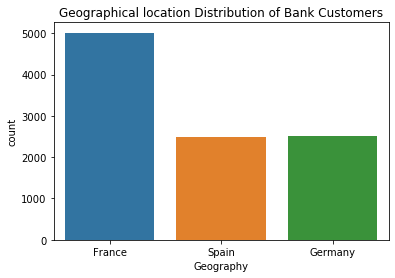

In [7]:
sns.countplot(dataset['Geography'])
plt.title('Geographical location Distribution of Bank Customers')
plt.show()

##### 2.5 Gender Distribution

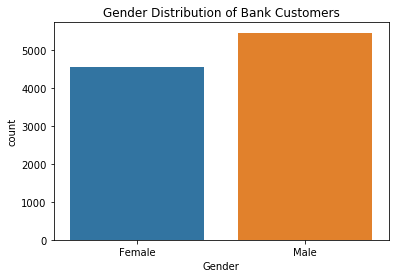

In [8]:
sns.countplot(dataset['Gender'])
plt.title('Gender Distribution of Bank Customers')
plt.show()

 ####  2.6 review the 'Status' relation with categorical variables

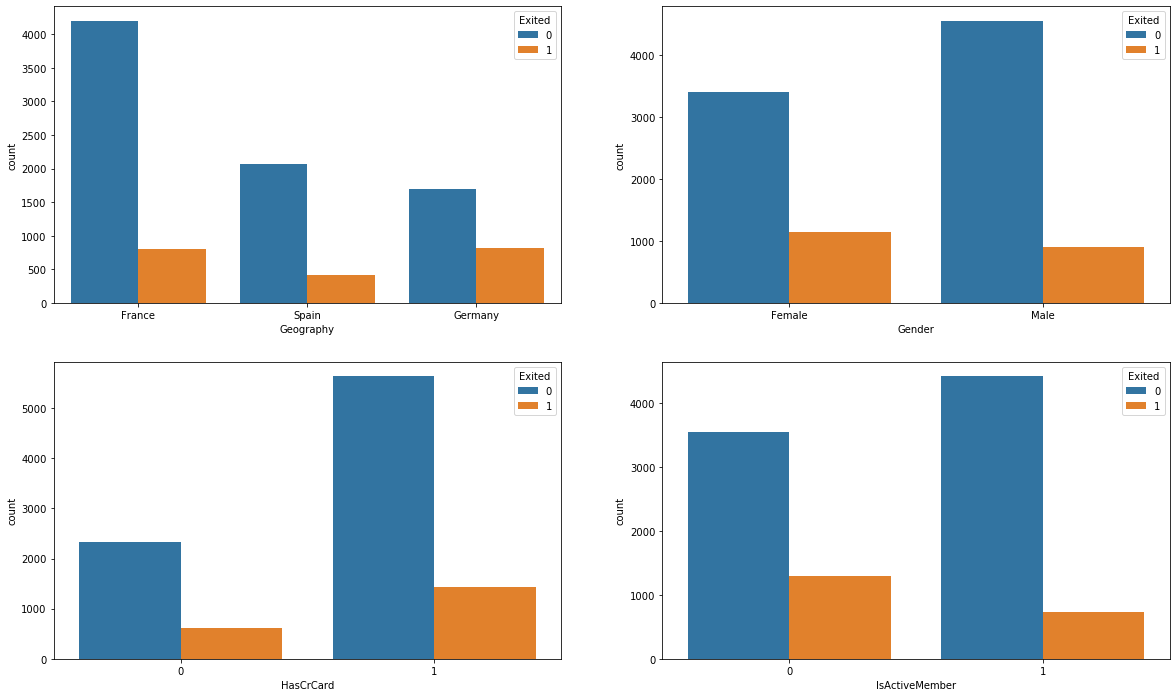

In [9]:

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

- Majority of the data is from persons from France.

- The proportion of female customers churning is also greater than that of male customers
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
-  Inactive members have a greater churn compare to other other graph.

####  2.7 pair plot

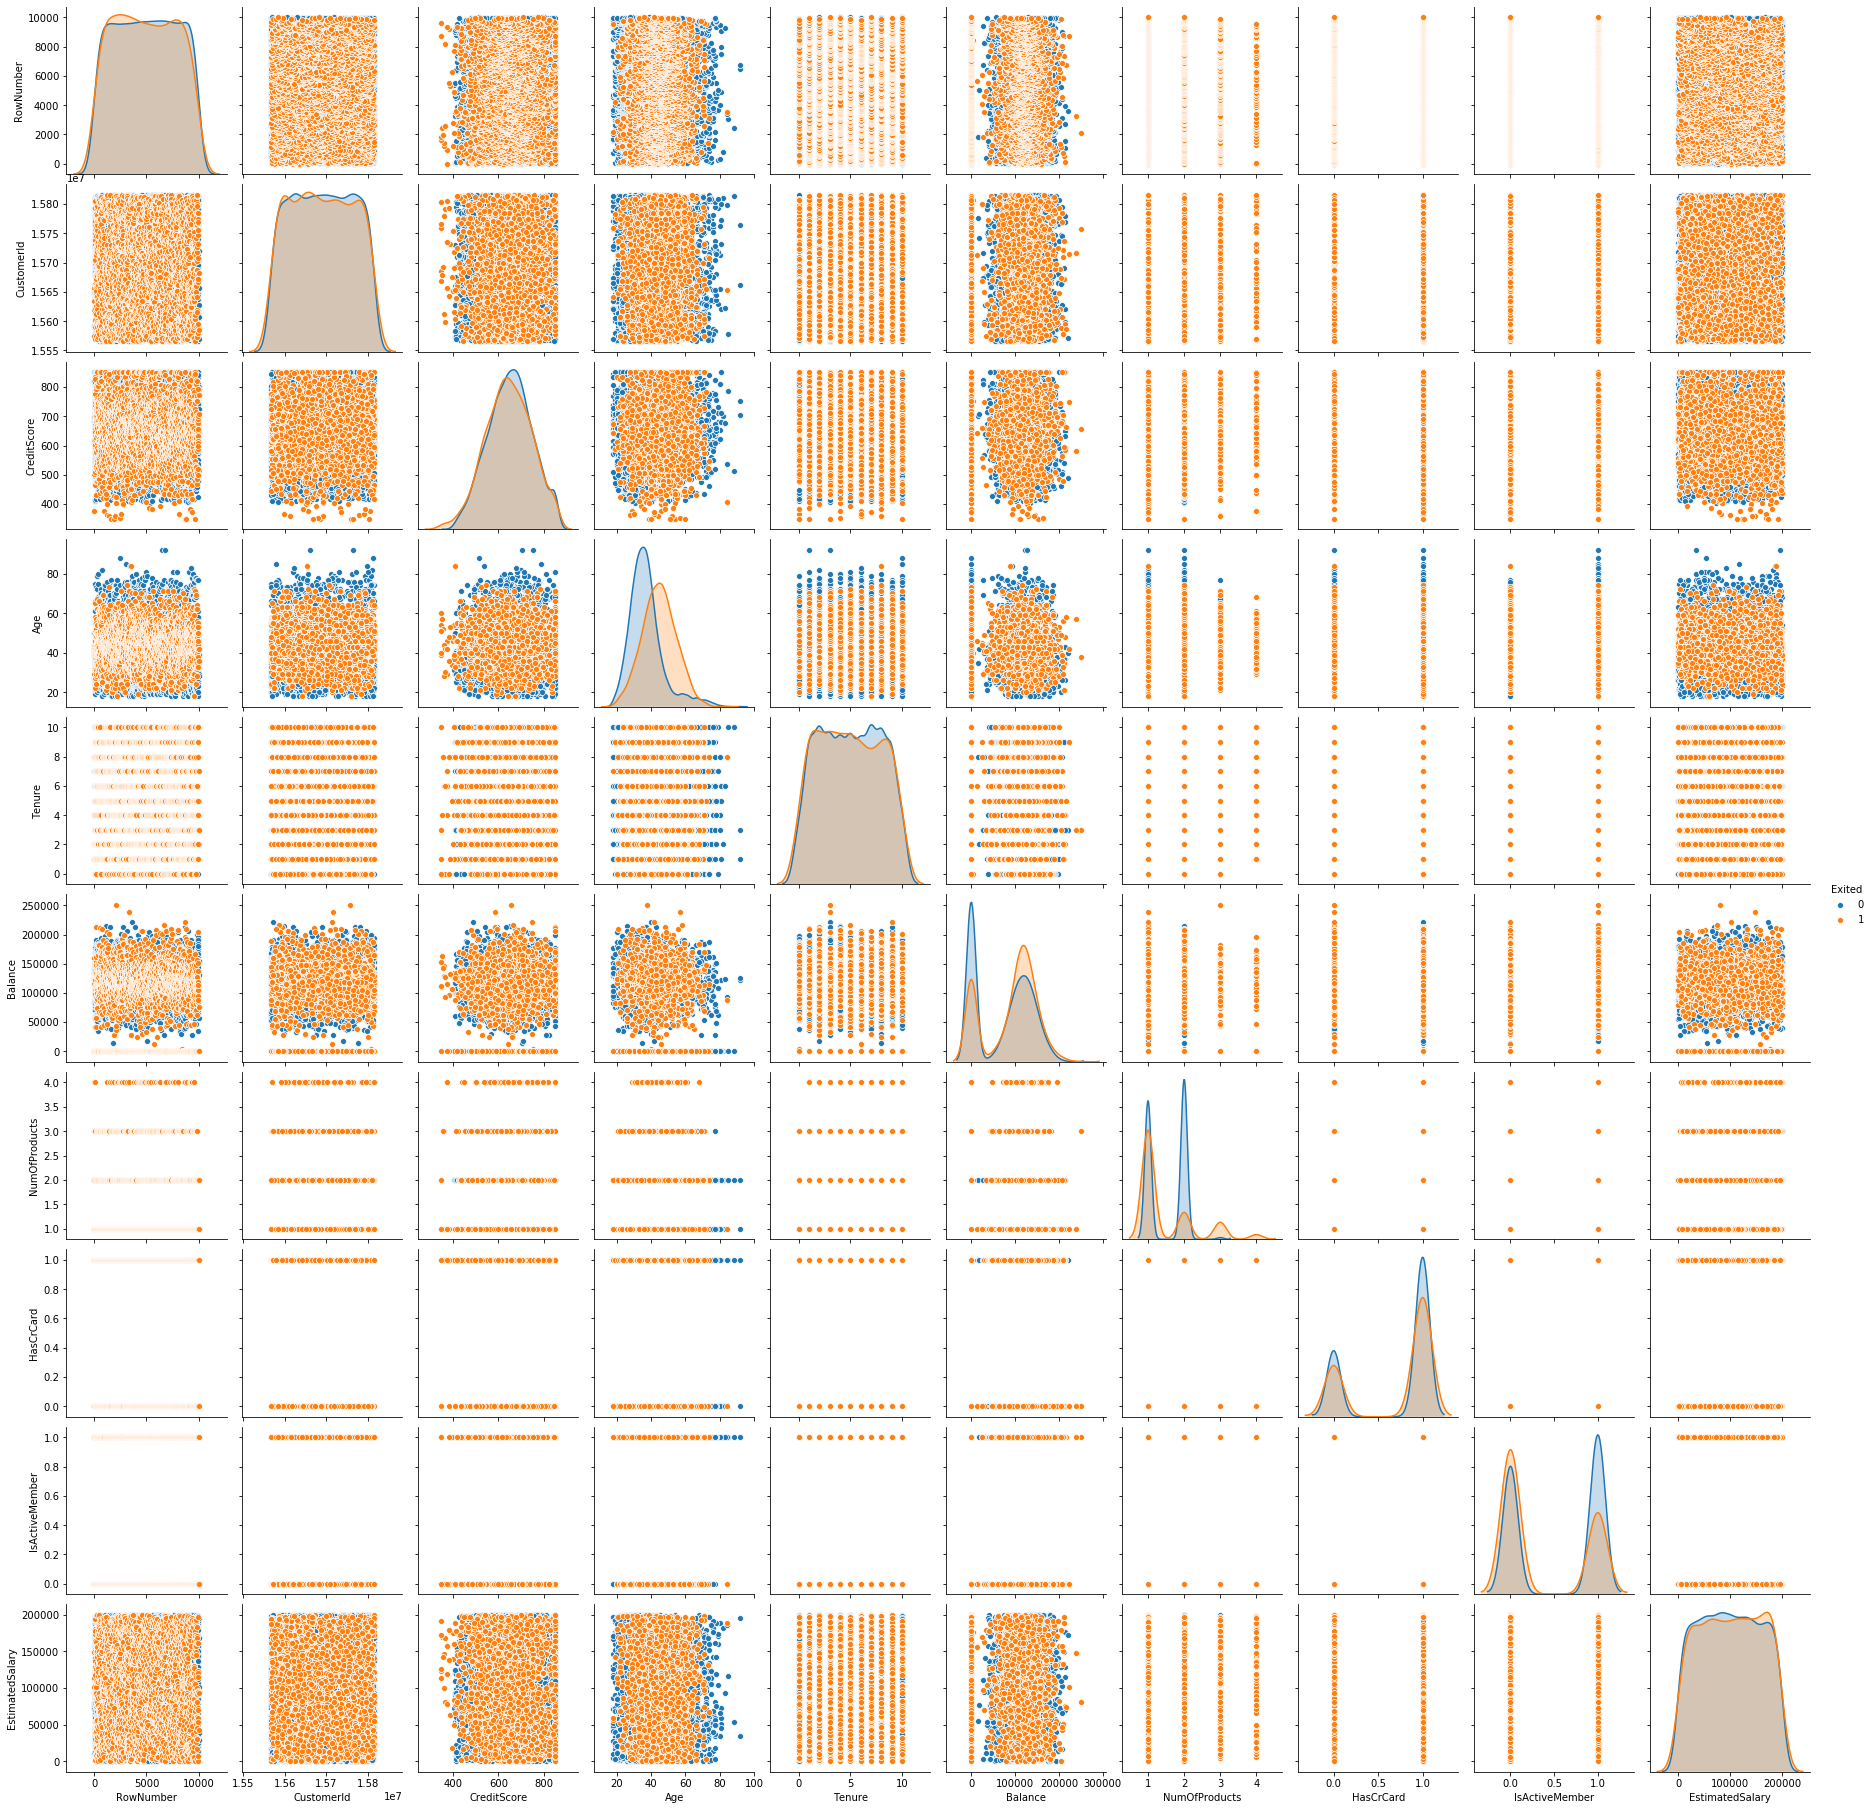

In [10]:
sns.pairplot(dataset, hue = 'Exited')

- Above the graph we can see that the relation b/w the features.

#### 2.8  finding the correlation b/w the dataset

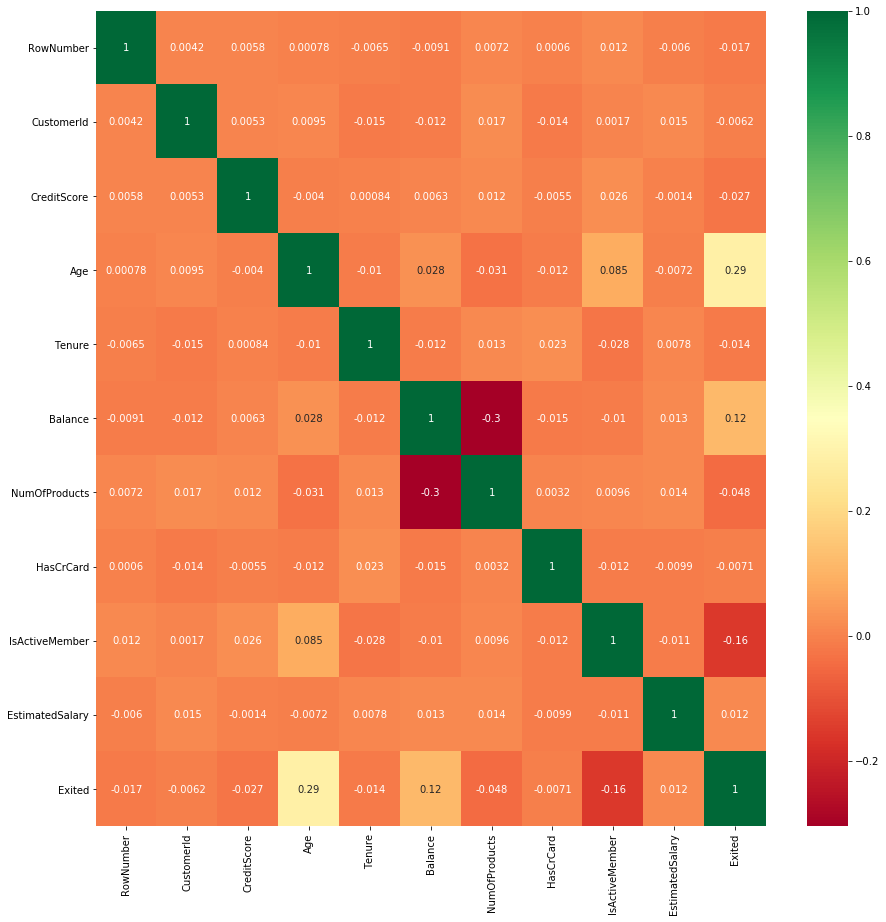

In [11]:
plt.figure(figsize = (15,15))
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

- Here RowNumber & CustomerID is highly negative correalted & For modeling  we will not consider these features. 

### 3. Data Preparing

#### 3.1 dependent and independent features

In [12]:
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [13]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### 3.2 Encoding categorical data

##### 3.2.1 Label Encoding the "Gender" column

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [16]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


 ##### 3.2.2 One Hot Encoding the "Geography" column

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [19]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### 3.3 Splitting the data into train and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#### 3.4  Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [23]:
print(y_train)

[0 0 0 ... 0 0 1]


###  Part 4  Modeling (Building the ANN)

In [24]:

import tensorflow as tf

####  4.1 intializing the ANN

In [25]:
ann = tf.keras.models.Sequential()

##### 4.2  Adding the input layer and the first hidden layer

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

###### 4.3  Adding the second  Hidden Layer

In [27]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### 4.4 adding the output layer

In [28]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

##### 4.5 compile the ANN

In [29]:
ann.compile(optimizer  ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##### 4.6 Fitting ANN to the train set

In [30]:
model_history = ann.fit(X_train, y_train,validation_split=0.33,batch_size = 10, epochs = 50)

Train on 5359 samples, validate on 2641 samples
Epoch 1/50
5359/5359 [==============================] - 3s 570us/sample - loss: 0.5564 - accuracy: 0.7522 - val_loss: 0.4775 - val_accuracy: 0.7955
Epoch 2/50
5359/5359 [==============================] - 3s 467us/sample - loss: 0.4474 - accuracy: 0.8056 - val_loss: 0.4361 - val_accuracy: 0.8111
Epoch 3/50
5359/5359 [==============================] - 2s 394us/sample - loss: 0.4161 - accuracy: 0.8242 - val_loss: 0.4225 - val_accuracy: 0.8171
Epoch 4/50
5359/5359 [==============================] - 3s 516us/sample - loss: 0.4042 - accuracy: 0.8317 - val_loss: 0.4135 - val_accuracy: 0.8205
Epoch 5/50
5359/5359 [==============================] - 3s 540us/sample - loss: 0.3955 - accuracy: 0.8343 - val_loss: 0.4065 - val_accuracy: 0.8247
Epoch 6/50
5359/5359 [==============================] - 3s 555us/sample - loss: 0.3887 - accuracy: 0.8341 - val_loss: 0.3991 - val_accuracy: 0.8277
Epoch 7/50
5359/5359 [==============================] - 3s 563us

### 5. Visualizing the performace of ANN Model 

In [31]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### 5.1 visualizing the accuracy of model

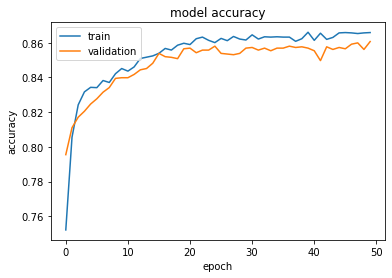

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####  5.2 Visualizing the loss of the model

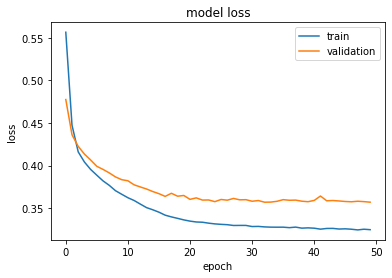

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#####  6.predict the test set

In [34]:

y_pred = ann.predict(X_test)
y_pred =(y_pred > 0.5)

##### 7.  Evaluate the performance

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1517   78]
 [ 197  208]]
0.8625


### 8. conclusion :
Here we build a model using Artificial Neural Network and we get approx 86% accuracy.This model can predict
customer will leave the bank or not based on the given dataset.